<a href="https://colab.research.google.com/github/jisoolee11/Deep-Learning/blob/main/DeepLearning%20for%20everyone/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>오토인코더 학습하기

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# MNIST 데이터 셋을 호출
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# 생성자 모델 만들기
autoencoder = Sequential()

In [4]:
# 인코딩 부분
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

In [5]:
# 디코딩 부분
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [6]:
# 전체 구조 확인
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

In [8]:
# 컴파일 및 학습을 하는 부분
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 79s 166ms/step - loss: 0.3046 - val_loss: 0.1326
Epoch 2/50
469/469 [==============================] - 78s 165ms/step - loss: 0.1288 - val_loss: 0.1183
Epoch 3/50
469/469 [==============================] - 78s 167ms/step - loss: 0.1170 - val_loss: 0.1115
Epoch 4/50
469/469 [==============================] - 78s 166ms/step - loss: 0.1106 - val_loss: 0.1063
Epoch 5/50
469/469 [==============================] - 78s 167ms/step - loss: 0.1061 - val_loss: 0.1030
Epoch 6/50
469/469 [==============================] - 79s 169ms/step - loss: 0.1030 - val_loss: 0.1008
Epoch 7/50
469/469 [==============================] - 79s 168ms/step - loss: 0.1007 - val_loss: 0.0977
Epoch 8/50
469/469 [==============================] - 78s 166ms/step - loss: 0.0988 - val_loss: 0.0963
Epoch 9/50
469/469 [==============================] - 78s 167ms/step - loss: 0.0971 - val_loss: 0.0951
Epoch 10/50
469/469 [==============================] - 79s 168ms/step - l

In [9]:
# 학습된 결과를 출력하는 부분
random_test = np.random.randint(X_test.shape[0], size = 5)

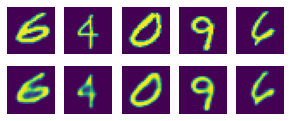

In [10]:
# 테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(X_test)  #앞서 만든 오토인코더 모델에 넣기

plt.figure(figsize=(7, 2)) #출력 이미지 크기 정하기

for i, image_idx in enumerate(random_test):
  # 랜덤으로 뽑은 이미지를 차례로 나열
  ax = plt.subplot(2, 7, i + 1)
  # 테스트할 이미지를 먼저 그대로 보여줌
  plt.imshow(X_test[image_idx].reshape(28, 28))
  ax.axis('off')
  ax = plt.subplot(2, 7, 7 + i + 1)
  # 오토인코딩 결과를 다음 열에 입력
  plt.imshow(ae_imgs[image_idx].reshape(28, 28))
  ax.axis('off')
plt.show()